In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
data = load_iris()
X = data.data[:,2:].T
Y = data.target.T
Y = Y.astype('uint8') 

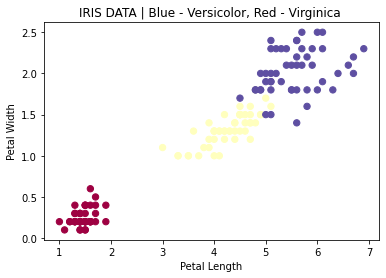

In [3]:
plt.scatter(X[:][0], X[:][1], c=Y[:], s=40, cmap=plt.cm.Spectral);
plt.title("IRIS DATA | Blue - Versicolor, Red - Virginica ")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

In [33]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01 
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    return parameters

In [34]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 6
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

In [35]:
def forward_propagation(X, parameters):   
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = 1/(1+np.exp(-Z2))
    
    cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
    return A2, cache

In [45]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[0]
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    
    return cost

In [46]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    A1 = cache['A1']
    A2 = cache['A2']
     
    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    grads = {"dW1": dW1,"db1": db1,"dW2": dW2,"db2": db2}
    
    return grads

In [47]:
def update_parameters(parameters, grads, learning_rate=1.2):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    
    return parameters

In [48]:
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
    return parameters,n_h

parameters = nn_model(X,Y , n_h = 6, num_iterations=10000, print_cost=True)


Cost after iteration 0: 8976.587562
Cost after iteration 1000: 115509.732176
Cost after iteration 2000: 124462.957998
Cost after iteration 3000: 129682.032352
Cost after iteration 4000: 133383.057848
Cost after iteration 5000: 136265.221981
Cost after iteration 6000: 129882.743325
Cost after iteration 7000: 133525.698093
Cost after iteration 8000: 136358.170856
Cost after iteration 9000: 138675.978369


In [49]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[0, :].min() - 0.25, X[0, :].max() + 0.25
    y_min, y_max = X[1, :].min() - 0.25, X[1, :].max() + 0.25
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)